***1. Loading the data***

In [18]:
#Đỗ Ngọc Lâm
#B22DCCN476

import numpy as np
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


***2. Cleaning the data***

In [19]:
#Đỗ Ngọc Lâm
#B22DCCN476
#-------check for null values -------
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
#Đỗ Ngọc Lâm
#B22DCCN476

#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [21]:
#Đỗ Ngọc Lâm
#B22DCCN476

#---replace 0s by NaN---
df[['Glucose','BloodPressure','SkinThickness',
'Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness',
'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.nan)

df.fillna(df.mean(), inplace = True) # replace NaN with the mean
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


***3. Examining the correlation between the features***

In [22]:
#Đỗ Ngọc Lâm
#B22DCCN476

corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

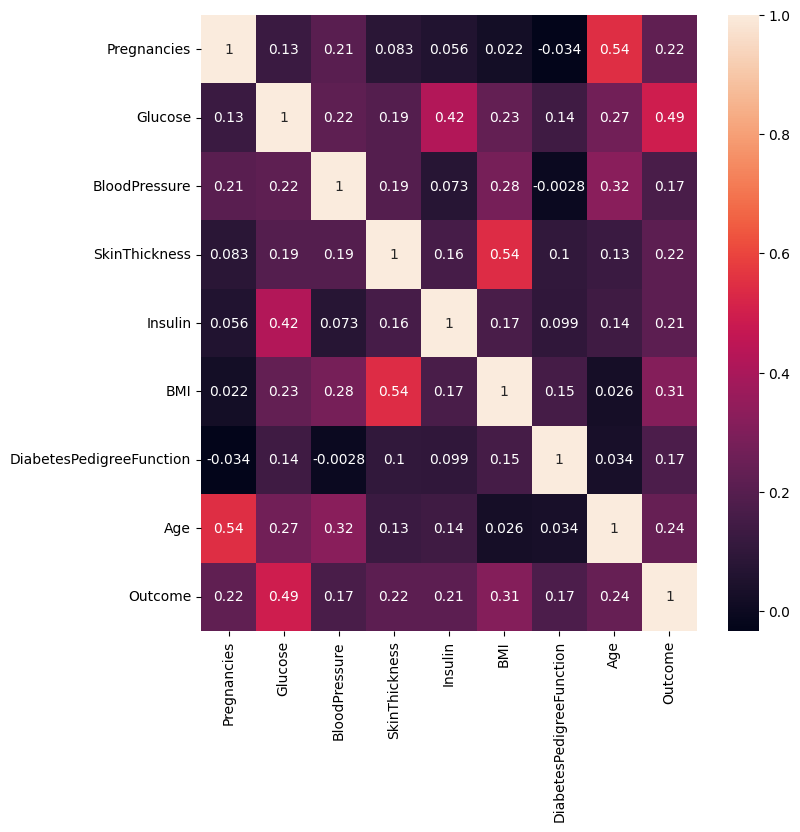

In [23]:
#Đỗ Ngọc Lâm
#B22DCCN476
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

In [24]:
#Đỗ Ngọc Lâm
#B22DCCN476

#---get the top six features that has the highest correlation---
print(df.corr().nlargest(6, 'Outcome').index)
print(df.corr().nlargest(6, 'Outcome').values[:,8])

Index(['Outcome', 'Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness'], dtype='object')
[1.         0.49292767 0.31192439 0.23835598 0.22189815 0.21529921]


==> As can be seen, Glucose, BMI, Age, Pregancies, Skinthickness will be the top five features that have the highest correlation

***4. TRAIN MODELS***

In [25]:
#Đỗ Ngọc Lâm
#B22DCCN476

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

from sklearn.metrics import (
    accuracy_score, mean_absolute_error, mean_squared_error,
    roc_curve, auc, confusion_matrix
)

# top five features that have the highest correlation

features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']
target = 'Outcome'

X = df[features].copy()
y = df[target].astype(int).copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (576, 5) Test size: (192, 5)


In [26]:
# Đỗ Ngọc Lâm - B22DCCN476

#Using 5 models
models = {
    "LogReg": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "KNN": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=19))
    ]),
    "SVM": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42))
    ]),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
}

results = []

cv = StratifiedKFold(n_splits= 10, shuffle=True, random_state=42)

def oof_probabilities(model, X, y, cv):
    """
    Trả về y_prob_oof (out-of-fold) cho lớp 1.
    - Ưu tiên predict_proba[:,1].
    - Nếu chỉ có decision_function, dùng decision score rồi min-max scale về [0,1].
    - Nếu không có cả hai, fallback sang y_pred (0/1) dạng float.
    """
    y_prob = None
    if hasattr(model, "predict_proba"):
        # cross_val_predict với method='predict_proba' -> shape (n_samples, 2)
        proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
        y_prob = proba[:, 1]
    elif hasattr(model, "decision_function"):
        scores = cross_val_predict(model, X, y, cv=cv, method='decision_function')
        # Min-max scale trên toàn bộ OOF scores
        s_min, s_max = scores.min(), scores.max()
        y_prob = (scores - s_min) / (s_max - s_min + 1e-8)
    else:
        # Fallback: dùng dự đoán nhị phân
        y_pred = cross_val_predict(model, X, y, cv=cv, method='predict')
        y_prob = y_pred.astype(float)
    return y_prob

cv_rows = []
for name, model in models.items():
    # Accuracy dùng cross_val_score (chuẩn scikit)
    acc_cv = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    acc_mean, acc_std = acc_cv.mean(), acc_cv.std()

    # OOF probabilities cho các metric dựa trên xác suất/điểm số
    y_prob_oof = oof_probabilities(model, X, y, cv)
    mae_cv = mean_absolute_error(y, y_prob_oof)
    mse_cv = mean_squared_error(y, y_prob_oof)
    rmse_cv = mse_cv ** 0.5

    cv_rows.append([name, acc_mean, acc_std, mae_cv, mse_cv, rmse_cv])

cv_metrics_df = pd.DataFrame(
    cv_rows,
    columns=["model", "cv_accuracy_mean", "cv_accuracy_std", "cv_mae", "cv_mse", "cv_rmse"]
).sort_values("cv_accuracy_mean", ascending=False).reset_index(drop=True)

print("== 10-fold Cross-Validation Metrics ==")
display(cv_metrics_df)

# Gợi ý chọn model tốt nhất theo CV accuracy
best_cv = cv_metrics_df.iloc[0]
print(f"Best by CV accuracy: {best_cv['model']} "
      f"(acc={best_cv['cv_accuracy_mean']:.4f} ± {best_cv['cv_accuracy_std']:.4f})")


== 10-fold Cross-Validation Metrics ==


,model,cv_accuracy_mean,cv_accuracy_std,cv_mae,cv_mse,cv_rmse
0,LogReg,0.769446,0.029809,0.312171,0.158240,0.397794
1,KNN,0.751094,0.054613,0.322848,0.162450,0.403051
2,RandomForest,0.751077,0.055676,0.317969,0.170127,0.412465
3,SVM,0.748633,0.043103,0.331670,0.166741,0.408339
4,DecisionTree,0.735475,0.053062,0.302782,0.180878,0.425297


Best by CV accuracy: LogReg (acc=0.7694 ± 0.0298)


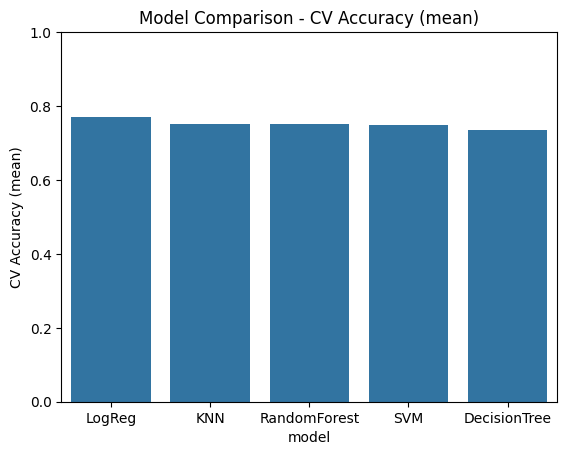

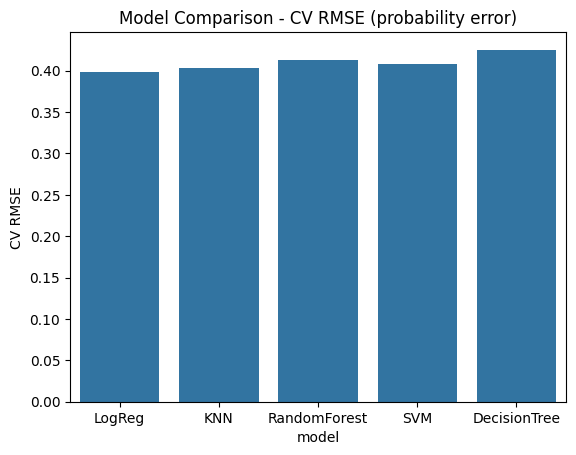

In [27]:
# Đỗ Ngọc Lâm - B22DCCN476

plt.figure()
sns.barplot(data=cv_metrics_df, x="model", y="cv_accuracy_mean")
plt.title("Model Comparison - CV Accuracy (mean)")
plt.ylim(0,1)
plt.ylabel("CV Accuracy (mean)")
plt.show()

plt.figure()
sns.barplot(data=cv_metrics_df, x="model", y="cv_rmse")
plt.title("Model Comparison - CV RMSE (probability error)")
plt.ylabel("CV RMSE")
plt.show()

Plotting ROC for best CV model: LogReg


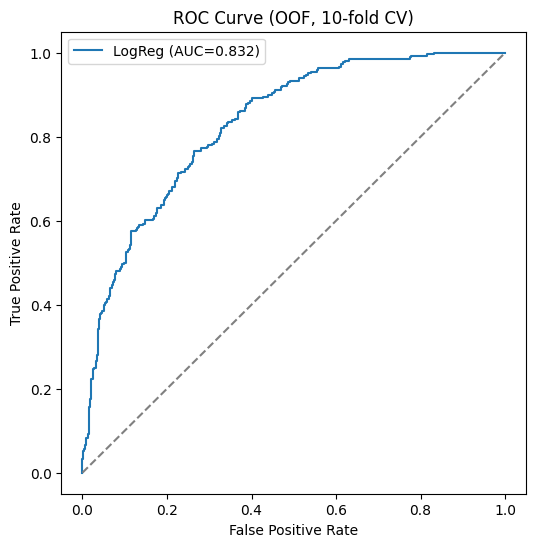

In [28]:
# Đỗ Ngọc Lâm - B22DCCN476
# ROC curve trên OOF prediction của model tốt nhất

from sklearn.metrics import roc_curve, auc

best_name = cv_metrics_df.iloc[0]["model"]
print("Plotting ROC for best CV model:", best_name)

y_prob_oof = oof_probabilities(models[best_name], X, y, cv)
fpr, tpr, _ = roc_curve(y, y_prob_oof)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"{best_name} (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (OOF, 10-fold CV)")
plt.legend()
plt.show()


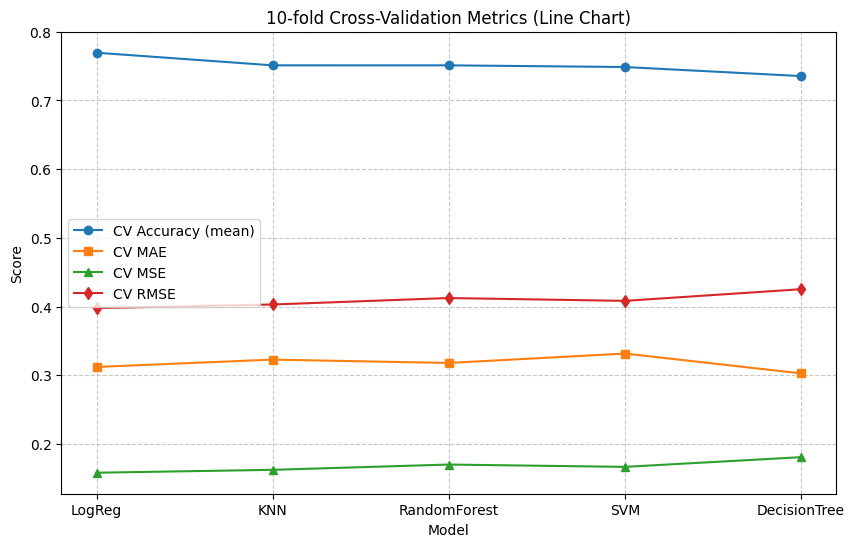

In [29]:
# Đỗ Ngọc Lâm - B22DCCN476

plt.figure(figsize=(10,6))

# Vẽ đường cho từng metric
plt.plot(cv_metrics_df["model"], cv_metrics_df["cv_accuracy_mean"], 
         marker='o', label="CV Accuracy (mean)")
plt.plot(cv_metrics_df["model"], cv_metrics_df["cv_mae"], 
         marker='s', label="CV MAE")
plt.plot(cv_metrics_df["model"], cv_metrics_df["cv_mse"], 
         marker='^', label="CV MSE")
plt.plot(cv_metrics_df["model"], cv_metrics_df["cv_rmse"], 
         marker='d', label="CV RMSE")

# Trang trí
plt.title("10-fold Cross-Validation Metrics (Line Chart)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


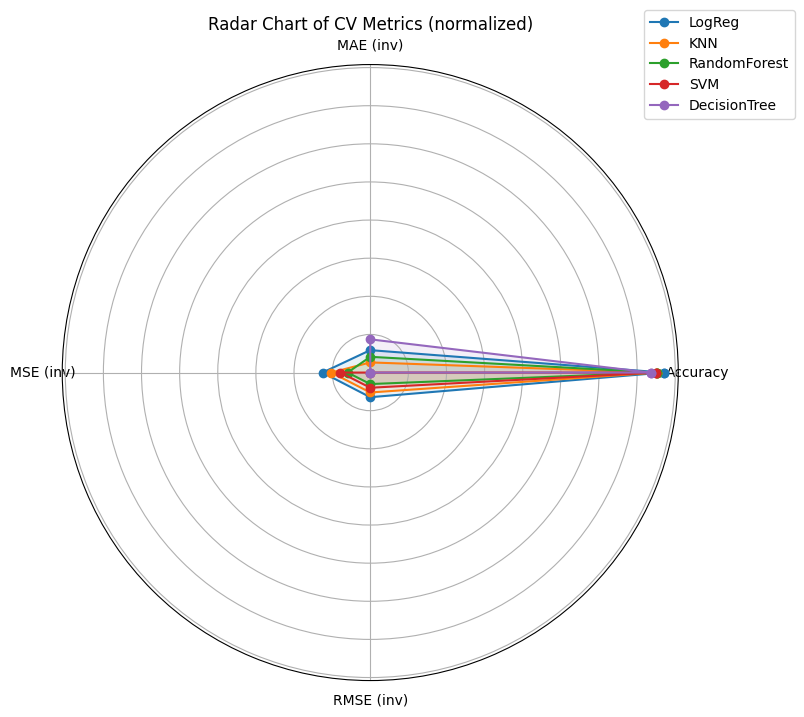

In [30]:
# Đỗ Ngọc Lâm - B22DCCN476
# Radar chart so sánh 4 metrics trên từng model

from math import pi

# Chọn các metric để hiển thị
metrics = ["cv_accuracy_mean", "cv_mae", "cv_mse", "cv_rmse"]

# Chuẩn hóa dữ liệu về [0,1] để vẽ đẹp (accuracy cao tốt, lỗi thấp tốt → ta đảo chiều lỗi)
df_radar = cv_metrics_df.copy()
for m in ["cv_mae","cv_mse","cv_rmse"]:
    df_radar[m] = 1 - (df_radar[m] / df_radar[m].max())  # đảo chiều: càng nhỏ càng tốt → càng gần 1

# Cần lặp lại cột đầu tiên để khép vòng radar
categories = metrics
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += [angles[0]]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for i, row in df_radar.iterrows():
    values = row[metrics].tolist()
    values += [values[0]]
    ax.plot(angles, values, marker='o', label=row["model"])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(["Accuracy","MAE (inv)","MSE (inv)","RMSE (inv)"])
ax.set_yticklabels([])
plt.title("Radar Chart of CV Metrics (normalized)")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()


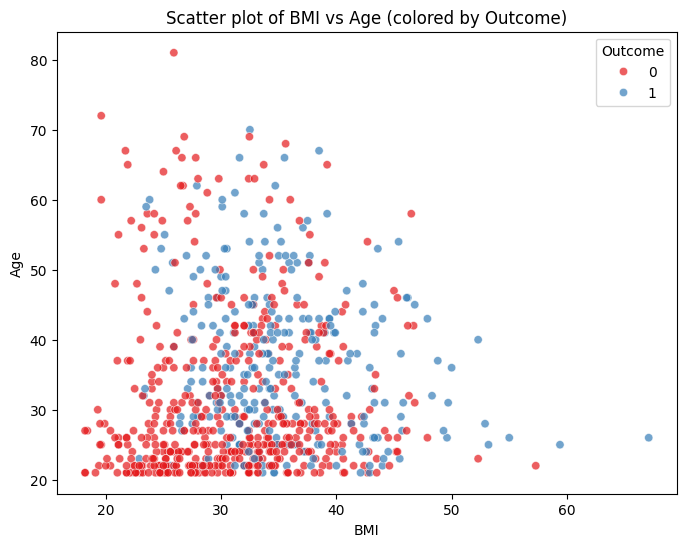

In [31]:
#Đỗ Ngọc Lâm - B22DCCN476
# Vẽ biểu đồ scatter giữa BMI và Age, phân màu theo Outcome
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="BMI", y="Age", hue="Outcome", palette="Set1", alpha=0.7)
plt.title("Scatter plot of BMI vs Age (colored by Outcome)")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.legend(title="Outcome")
plt.show()

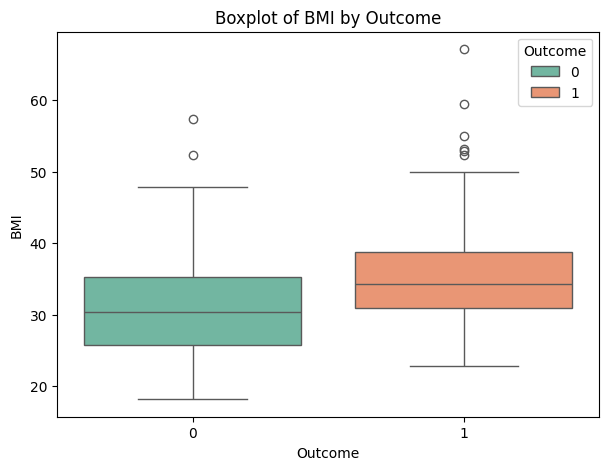

In [32]:
#Đỗ Ngọc Lâm - B22DCCN476
# Vẽ boxplot so sánh phân phối BMI giữa hai nhóm Outcome
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Outcome", y="BMI", hue = "Outcome", palette="Set2")
plt.title("Boxplot of BMI by Outcome")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

In [33]:
# Đỗ Ngọc Lâm - B22DCCN476

from sklearn.base import clone
import joblib

FEATURES = ['Glucose','BMI','Age','Pregnancies','SkinThickness']

# 1) Lấy model tốt nhất theo CV accuracy
best_name = cv_metrics_df.iloc[0]["model"]
best_base = models[best_name]
print("Best by CV accuracy:", best_name)

# 2) Refit trên toàn bộ dữ liệu (X, y) để triển khai
best_model = clone(best_base).fit(X[FEATURES], y)

# 3) Lưu kèm danh sách features để đảm bảo đúng thứ tự khi predict
bundle = {"model": best_model, "features": FEATURES}
joblib.dump(bundle, "best_model.pkl")
print("Saved best_model.pkl")


Best by CV accuracy: LogReg
Saved best_model.pkl


***5. DEPLOY ON WEB WITH FLASK FOR THE BEST MODEL***

In [ ]:
# Đỗ Ngọc Lâm - B22DCCN476

from flask import Flask, request, jsonify
import numpy as np
import joblib

# ====== Load model ======
BUNDLE_PATH = "best_model.pkl"
bundle = joblib.load(BUNDLE_PATH)
model = bundle["model"]
FEATURES = bundle["features"]    # ['Glucose','BMI','Age','Pregnancies','SkinThickness']

app = Flask(__name__)

# ====== Routes ======
@app.route("/", methods=["GET"])
def index():
    # Trang chủ đẹp + JS fetch /predict
    return f"""
<!doctype html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta name="viewport" content="width=device-width, initial-scale=1"/>
<title>Diabetes Predictor</title>
<style>
  :root {{
    --bg: #0f172a;         /* slate-900 */
    --card: #111827;       /* gray-900 */
    --muted: #94a3b8;      /* slate-400 */
    --text: #e5e7eb;       /* gray-200 */
    --primary: #22d3ee;    /* cyan-400 */
    --ok: #10b981;         /* emerald-500 */
    --warn: #f59e0b;       /* amber-500 */
    --danger: #ef4444;     /* red-500 */
  }}
  * {{ box-sizing: border-box; }}
  body {{
    margin: 0; padding: 0;
    background: radial-gradient(1200px 600px at 80% -10%, rgba(34,211,238,.15), transparent),
                radial-gradient(800px 400px at 10% 120%, rgba(16,185,129,.12), transparent),
                var(--bg);
    color: var(--text);
    font-family: ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Helvetica, Arial, "Apple Color Emoji","Segoe UI Emoji";
    min-height: 100vh;
    display: grid; place-items: center;
    padding: 24px;
  }}
  .card {{
    width: 100%;
    max-width: 860px;
    background: linear-gradient(180deg, rgba(255,255,255,.03), rgba(255,255,255,.01));
    border: 1px solid rgba(148,163,184,.15);
    border-radius: 20px;
    box-shadow: 0 10px 40px rgba(0,0,0,.35);
    overflow: hidden;
  }}
  .card-header {{
    padding: 20px 24px;
    border-bottom: 1px solid rgba(148,163,184,.15);
    display: flex; align-items: center; justify-content: space-between; gap: 12px;
  }}
  .title {{
    font-size: 20px; font-weight: 700; letter-spacing: .3px;
  }}
  .subtitle {{ color: var(--muted); font-size: 13px; }}
  .grid {{
    display: grid; gap: 14px; padding: 20px 24px;
    grid-template-columns: repeat(5, 1fr);
  }}
  @media (max-width: 900px) {{
    .grid {{ grid-template-columns: 1fr 1fr; }}
  }}
  @media (max-width: 560px) {{
    .grid {{ grid-template-columns: 1fr; }}
  }}
  .field label {{
    display:block; font-size:12px; color:var(--muted); margin-bottom:6px;
  }}
  .input {{
    width: 100%; padding: 10px 12px; border-radius: 12px;
    border: 1px solid rgba(148,163,184,.25);
    background: #0b1220; color: var(--text); outline: none;
  }}
  .input:focus {{ border-color: var(--primary); box-shadow: 0 0 0 3px rgba(34,211,238,.18); }}
  .actions {{ display:flex; gap:10px; padding: 0 24px 20px; flex-wrap: wrap; }}
  .btn {{
    border: none; border-radius: 12px; padding: 10px 14px; font-weight: 600; cursor: pointer;
    background: var(--primary); color: #001018;
  }}
  .btn.secondary {{ background: transparent; color: var(--text); border:1px solid rgba(148,163,184,.35); }}
  .result {{
    padding: 18px 24px; border-top: 1px dashed rgba(148,163,184,.2);
    display: grid; gap: 10px;
  }}
  .badge {{
    display: inline-block; padding: 6px 10px; border-radius: 999px; font-size: 12px; font-weight: 700;
  }}
  .b-low  {{ background: rgba(16,185,129,.15); color: #c6f6d5; border:1px solid rgba(16,185,129,.35); }}
  .b-mid  {{ background: rgba(245,158,11,.15); color: #fde68a; border:1px solid rgba(245,158,11,.35); }}
  .b-high {{ background: rgba(239,68,68,.15); color: #fecaca; border:1px solid rgba(239,68,68,.35); }}
  .progress {{
    height: 10px; background: #0b1220; border:1px solid rgba(148,163,184,.25); border-radius: 999px; overflow: hidden;
  }}
  .bar {{ height:100%; background: linear-gradient(90deg, var(--ok), var(--warn), var(--danger)); width: 0%; transition: width .5s ease; }}
  pre {{
    margin: 0; padding: 12px; background: #0b1220; border-radius: 12px;
    border:1px solid rgba(148,163,184,.2); font-size: 12px; overflow:auto;
  }}
  .small {{ font-size: 12px; color: var(--muted); }}
  .footer {{ padding: 14px 24px; border-top:1px solid rgba(148,163,184,.15); color:var(--muted); font-size:12px; }}
</style>
</head>
<body>
  <div class="card">
    <div class="card-header">
      <div>
        <div class="title">🩺 Diabetes Predictor</div>
        <div class="subtitle">Model: {type(model).__name__} &middot; Features: {FEATURES}</div>
      </div>
      <button class="btn secondary" onclick="checkHealth()">Check /health</button>
    </div>

    <div class="grid">
      <div class="field"><label>Glucose</label><input id="g" class="input" type="number" step="1" min="0" value="120"></div>
      <div class="field"><label>BMI</label><input id="b" class="input" type="number" step="0.1" min="0" value="32.5"></div>
      <div class="field"><label>Age</label><input id="a" class="input" type="number" step="1" min="0" value="45"></div>
      <div class="field"><label>Pregnancies</label><input id="p" class="input" type="number" step="1" min="0" value="2"></div>
      <div class="field"><label>SkinThickness</label><input id="s" class="input" type="number" step="1" min="0" value="23"></div>
    </div>

    <div class="actions">
      <button class="btn" onclick="predict()">🔮 Predict</button>
      <span id="hint" class="small">Điền số hợp lệ & bấm Predict.</span>
    </div>

    <div class="result">
      <div id="summary" class="small">Chưa có kết quả.</div>
      <div class="progress"><div id="bar" class="bar"></div></div>
      <div><span id="badge" class="badge b-low" style="display:none;">LOW RISK</span></div>
      <div><pre id="json">{{ }}</pre></div>
    </div>

    <div class="footer">
      Gợi ý: Nếu deploy production, dùng Gunicorn + Nginx; xác thực đầu vào & giới hạn tốc độ.
    </div>
  </div>

<script>
async function checkHealth(){{
  const r = await fetch('/health');
  const j = await r.json();
  document.getElementById('json').textContent = JSON.stringify(j, null, 2);
  document.getElementById('summary').textContent = 'Health OK';
}}

function validNumber(v) {{
  return !(isNaN(v) || v === '' || v === null);
}}

function riskBadge(prob) {{
  const badge = document.getElementById('badge');
  badge.style.display = 'inline-block';
  badge.className = 'badge';
  if (prob < 0.33)      badge.classList.add('b-low'),  badge.textContent = 'LOW RISK';
  else if (prob < 0.66) badge.classList.add('b-mid'),  badge.textContent = 'MEDIUM RISK';
  else                  badge.classList.add('b-high'), badge.textContent = 'HIGH RISK';
}}

async function predict(){{
  const g = document.getElementById('g').value;
  const b = document.getElementById('b').value;
  const a = document.getElementById('a').value;
  const p = document.getElementById('p').value;
  const s = document.getElementById('s').value;

  // Validate đơn giản
  const fields = [g,b,a,p,s];
  if (!fields.every(validNumber)) {{
    document.getElementById('summary').textContent = 'Vui lòng nhập đầy đủ số hợp lệ.';
    return;
  }}

  document.getElementById('summary').textContent = 'Đang dự đoán…';
  document.getElementById('bar').style.width = '0%';

  const body = {{
    Glucose: parseFloat(g), BMI: parseFloat(b), Age: parseFloat(a),
    Pregnancies: parseInt(p), SkinThickness: parseFloat(s)
  }};

  const r = await fetch('/predict', {{
    method:'POST', headers:{{'Content-Type':'application/json'}}, body: JSON.stringify(body)
  }});
  const j = await r.json();

  const prob = (j.probability_of_diabetes ?? 0);
  const pct = Math.max(0, Math.min(100, Math.round(prob*100)));

  document.getElementById('json').textContent = JSON.stringify(j, null, 2);
  document.getElementById('summary').innerHTML = 
    `Prediction: <b>{'{'}{'}'}</b>`.replace('{{}}', j.prediction) + 
    ` &middot; Probability: <b>${{pct}}%</b>`;
  document.getElementById('bar').style.width = pct + '%';
  riskBadge(prob);
}}
</script>
</body>
</html>
    """

@app.route("/favicon.ico")
def favicon():
    return ("", 204)

@app.route("/health", methods=["GET"])
def health():
    return jsonify({"status": "ok", "model": type(model).__name__, "features": FEATURES})

@app.route("/predict", methods=["POST"])
def predict():
    """
    POST JSON:
    {{ "Glucose":120, "BMI":32.5, "Age":45, "Pregnancies":2, "SkinThickness":23 }}
    """
    data = request.get_json(force=True) or {}
    try:
        x = np.array([[float(data.get(f, 0)) for f in FEATURES]], dtype=float)
    except Exception as e:
        return jsonify({"error": f"Invalid input: {e}", "features_order": FEATURES}), 400

    if hasattr(model, "predict_proba"):
        prob = float(model.predict_proba(x)[:, 1][0])
    else:
        try:
            s = model.decision_function(x)
            prob = float((s - s.min()) / (s.max() - s.min() + 1e-8))
        except Exception:
            prob = float(model.predict(x)[0])

    pred = int(model.predict(x)[0])

    return jsonify({
        "prediction": pred,
        "probability_of_diabetes": prob,
        "features_order": FEATURES
    })

if __name__ == "__main__":
    # Trong notebook: set use_reloader=False
    app.run(host="0.0.0.0", port=5000, debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.11.99.121:5000
Press CTRL+C to quit
